# Interpolation Of Data

In [208]:
import numpy as np
import matplotlib.pyplot as plt

## 1.0 introduction

Interpolation is a way to come with a simple model function to fit data, when discrete data points are available.

## 1.1 Generate Data

First we will generate some data so it acts as our refernce when we interpolate.

In [209]:
def f(x):
    return 0.75*x**2+0.5*x+0.25
    #random funtion with random coefficients


Now we will plot the function to see what it looks like.

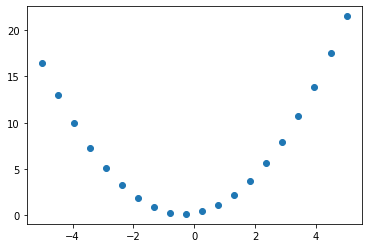

In [210]:
x = np.linspace(-5,5,20)
plot = plt.scatter(x,f(x))

In real applications the data is affected by noise so it never really looks as smooth as represented here, so to simultae the real world we will add some noise to the data using the np.random.randn() function.

In [211]:
random=2*np.random.rand(20)-1
#this way the random numbers are between -1 and 1 and using scaler multiplication we can span the whole numberline

In [212]:
data=np.array([x+0.2*random,f(x)+3*random])
#adding some noise to the data

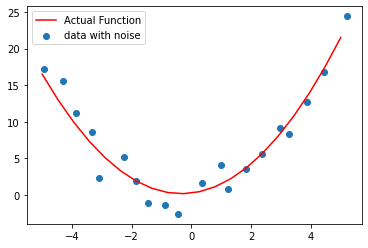

In [213]:
plt.scatter(data[0],data[1],label='data with noise')
plt.plot(x,f(x),'red',label='Actual Function')
plt.legend()

## 1.2 Interpolation Techniques

### 1.2.1 Spline Interpolation

Spline interpolation is based on mathematical model rather than a physical one, where it tries to connect all the data points using either linear or cubic functions, however it's a bit unrealistic as the spline interpolation takes into account the noise in the data, which is something we don't want to do, so it's only really useful if we have ideal data.

In [214]:
from scipy import interpolate

First we will use spline interpolation with the ideal data which isn't affected by noise.

#### linear spline

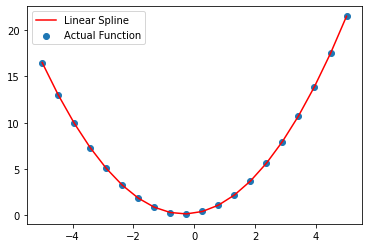

In [215]:
linearSpline=interpolate.interp1d(x,f(x),kind='linear')
plt.scatter(x,f(x),label='Actual Function')
plt.plot(x,linearSpline(x),'red',label='Linear Spline')
plt.legend()

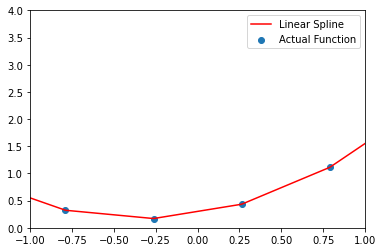

In [216]:
plt.xlim(-1,1)
plt.ylim(0,4)
plt.scatter(x,f(x),label='Actual Function')
xList=np.linspace(-1,1,200) #providing more points to the plot to see how linear spline works in more detail
plt.plot(xList,linearSpline(xList),'red',label='Linear Spline')
plt.legend()

When zooming it becomes obvious that the linear spline interpolation uses piecewise linear functions, so the derivative of the curve is non-continous, which maynot be very practical despite how good it looks when zooming out.

#### cubic spline

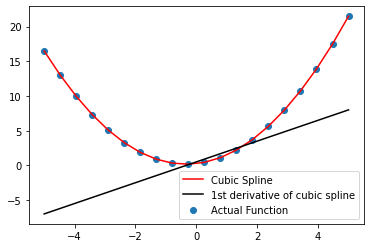

In [217]:
cubicSpline=interpolate.CubicSpline(x,f(x))
plt.scatter(x,f(x),label='Actual Function')
plt.plot(x,cubicSpline(x),'red',label='Cubic Spline')
plt.plot(x,cubicSpline(x,1),'black',label='1st derivative of cubic spline') #the second argument is the order of derivative
plt.legend()

Using cubic spline allows for a continuous derivative, which is more practical, $\newline$
As shown in the above plot, after using Cubic spline interpolation (which is implemented in scipy.interpolate.CubicSpline) we have the option to plot the derivative of the curve which wasn't possible with the linear spline interpolation as the derivative of it was non-continous.


- Zooming in

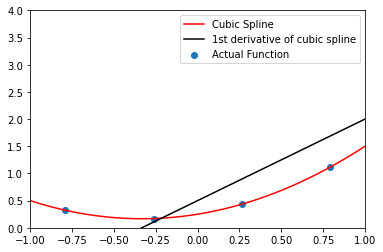

In [218]:

plt.xlim(-1,1)
plt.ylim(0,4)
plt.scatter(x,f(x),label='Actual Function')
plt.plot(xList,cubicSpline(xList),'red',label='Cubic Spline') #xList was defind earlier
plt.plot(xList,cubicSpline(xList,1),'black',label='1st derivative of cubic spline') #the second argumet is the order of derivative
plt.legend()


It's clear that the curve is smoother when we use cubic spline interpolation and that the derivative is continuous.

Now we will use spline interpolation with the data that is affected by noise.

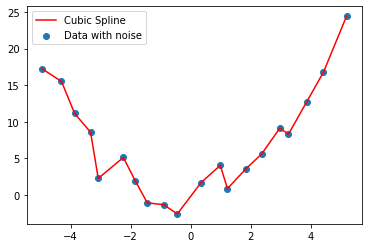

In [219]:
cubicSpline=interpolate.CubicSpline(data[0],data[1])
plt.scatter(data[0],data[1],label='Data with noise')
plt.plot(data[0],cubicSpline(data[0]),'red',label='Cubic Spline')
plt.legend()

Although it fits all the points perfectly,that's not what we want as we want to neglect noise. 

#### Univariate spline

In [220]:
smoothSpline=interpolate.UnivariateSpline(data[0],data[1])

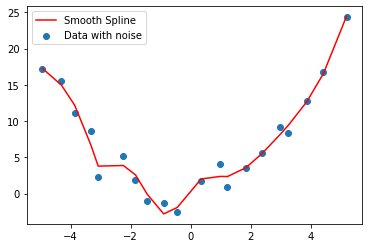

In [221]:
plt.scatter(data[0],data[1],label='Data with noise')
plt.plot(data[0],smoothSpline(data[0]),'red',label='Smooth Spline')
plt.legend()

This looks better, however it's still not as smooth as we want.

In [222]:
smoothSpline.set_smoothing_factor(500)

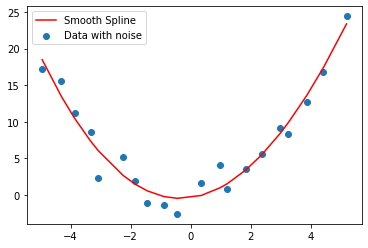

In [223]:
plt.scatter(data[0],data[1],label='Data with noise')
plt.plot(data[0],smoothSpline(data[0]),'red',label='Smooth Spline')
plt.legend()

This of course looks better, yet it can still be improved a little bit if we increased the number of points.

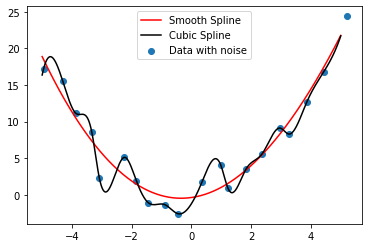

In [224]:
plt.scatter(data[0],data[1],label='Data with noise')
xList=np.linspace(-5,5,1000)
plt.plot(xList,smoothSpline(xList),'red',label='Smooth Spline')
plt.plot(xList,cubicSpline(xList),'black',label='Cubic Spline')
plt.legend()

It's important to notice that increasing the number of points made the univariate spline smoother and reliable as a model funtion however it didn't make the cubic splines much better as noise is still taken into consideration and treated as data points.

### 1.2.2 Solving equations to get one polynomial function

Since our data consists of 20 points,we will need 19th order polynomial to be able to perfectly interpolate. which means we need 20 equations to solve, that can be represented like that:

$$
\begin{bmatrix}
1 & x_{0}^{1} & x_{0}^{2} &.... & x_{0}^{19}\\
1 & x_{1}^{1} & x_{1}^{2} &....& x_{1}^{19}\\
....& ....& .... &....&....\\
1 & x_{19}^{1} & x_{19}^{2} &.... &x_{19}^{19}\\
\end{bmatrix}
\begin{bmatrix}
a_{0}\\
a_1\\
....\\
a_{19}\\
\end{bmatrix} = 
\begin{bmatrix}
y_{0}\\
y_{1}\\
....\\
y_{19}\\
\end{bmatrix}
$$

In [225]:
newX=np.empty((20,20),float)
newXWithNoise=np.empty((20,20),float)
for i in range (20):
    newX[i]=x**i  #to interpolate the ideal case
    newXWithNoise[i]=data[0]**i #to interpolate the realistic case
newX=np.transpose(newX)
newXWithNoise=np.transpose(newXWithNoise)

In [226]:
y=f(x)
yWithNoise=data[1]

In [227]:
a=np.linalg.solve(newX,y)
aWithNoise=np.linalg.solve(newXWithNoise,yWithNoise)

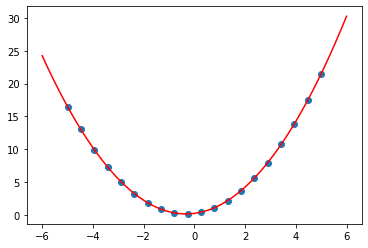

In [228]:
newXList=np.linspace(-6,6,1000)
yList=np.array([0])
for i in range(20):
    yList=yList+a[i] * newXList**i
plt.scatter(x,f(x))
plt.plot(newXList,yList,'red',label='fitting the ideal case via polynomials')

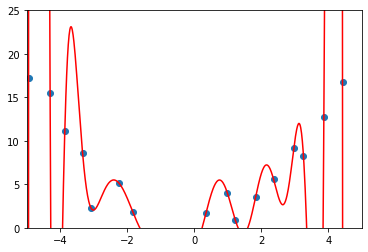

In [232]:
yWithNoiseList=np.array([0])
for i in range(20):
    yWithNoiseList= yWithNoiseList + aWithNoise[i] * newXList**i
plt.ylim(0,25)
plt.xlim(-5,5)
plt.scatter(data[0],data[1])
plt.plot(newXList,yWithNoiseList,'red')

We have seen how the function behaves in a specific range and how it connects between the given points, so let's now see how it behaves outside of this range

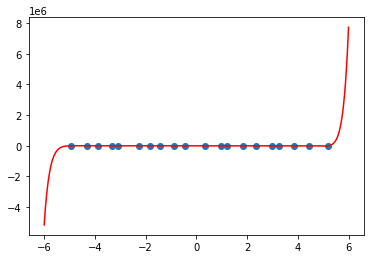

In [231]:
plt.scatter(data[0],data[1])
plt.plot(newXList,yWithNoiseList,'red')

Although the generated function connects between the points perfectly, however it's not good enough to use in interpolation for 2 reasons:
- the function behavior outside of the given points is unpredectiable (as shown in the above figure)
- the function generates a mathematical model rather than a physical one (the noise is taken into consideration and not neglected)

### 1.2.2 Using a model function

#### Define a model function

Let the model function be a polynomial function of the form:
$$ f(x)=a_{0}+a_{1}x+a_{2}x^{2}+\dots +a_{n}x^{n} = \sum_{i=0}^{n} a_{i}x^{i}$$

In [286]:
def modelFunction(x,a):
    sum=0
    for i in range(len(a)):
        sum=sum+a[i]*x**i
    return sum

In [287]:
modelFunction(x,a)

array([16.5       , 13.02354571,  9.96260388,  7.31717452,  5.08725762,
        3.27285319,  1.87396122,  0.89058172,  0.32271468,  0.17036011,
        0.43351801,  1.11218837,  2.20637119,  3.71606648,  5.64127424,
        7.98199446, 10.73822715, 13.9099723 , 17.49722992, 21.5       ])

But how to know the coefficients of the model function?

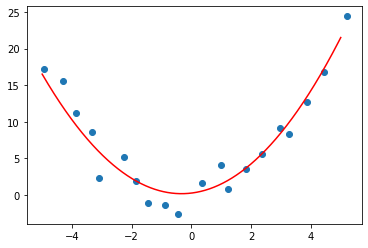

In [298]:
#if we replaced the coefficients with the actual values we already know, we will get our function
coeff=np.array([0.25,0.5,0.75])
plt.scatter(data[0],data[1])
plt.plot(xList,modelFunction(xList,coeff),'red')
#however in real applications we don't know the coefficients, so we have to find them?

#### Define error

To calculate the error we can use the Error of sum squares (SSE) formula:
$$ E=\sum_{i=0}^{n} (y_{i}-f(x_{i}))^{2}$$

where f is the fit function and y is the measured data.

In [251]:
def error(f,y,x,a):
  return np.sum(np.array([(y[i]-f(x[i],a))**2 for i in range(len(y))]))
#returns a single value that represents the error

#### Gradiant descent method to reduce the error of coefficients

The algorithm that we will use to update the coefficients of the model function and reduce the error is called Gradient Descent. (of course there are other algorithms that can be used) $\\$
The gradiant descent method is a vector of the same length as the coefficients, where each element is the partial derivative of the error with respect to the coefficient at that index.

$$G(E)_{j}=-2\sum_{i=0}^{n} (y_{i}-f(x_{i}))\frac{\partial {f(x_{i})}}{\partial {a_{i}}} =-2\sum_{i=0}^{n} (y_{i}-f(x_{i}))x_{i}^{j}$$

In [292]:
def gradError(f,y,x,a):
    return  -2 *np.array([
        np.sum(np.array([(y[i]-f(x[i],a))*x[i]**j for i in range(len(y))])) for j in range(len(a))])

#### Update coefficients and get the model funtion

In [326]:
iterations=10000
aTrial=2*np.random.rand(3)-1 
#starting coefficients
#since it's clear that the data can be represented by polynomials of order 2, the number of coefficients is 3
#choosing a different order polynomial(or even a completely different function i.e:exponential) to represent the function is possible too
h=0.00001 
# since the error is never zero due to the noise we have to define h to be a small value such that when the eror gets smaller 
# the coefficients will be closer to the actual values and at that point you don't want it to change that much due to the error
# caused by the noise so h will keep it nearly constatnt at that point
for i in range(iterations):
    aTrial= aTrial-h*gradError(modelFunction,data[1],data[0],aTrial)


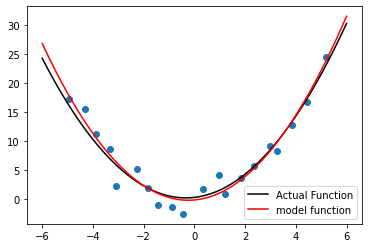

In [328]:
xList=np.linspace(-6,6,1000)
plt.scatter(data[0],data[1])
plt.plot(xList,f(xList),'black',label='Actual Function')
plt.plot(xList,modelFunction(xList,aTrial),'red',label='model function')
plt.legend()

As observed in the above figure, this is a reliable physical model function.

##### trying a different model function of the 4th order

In [347]:
iterations=100000
aTrial2=2*np.random.rand(5)-1 
h=0.0000001 
for i in range(iterations):
    aTrial2= aTrial2-h*gradError(modelFunction,data[1],data[0],aTrial2)


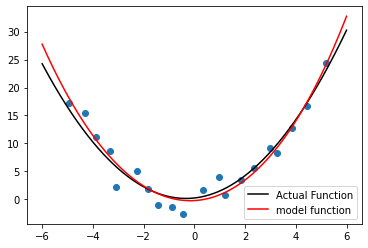

In [349]:
xList=np.linspace(-6,6,1000)
plt.scatter(data[0],data[1])
plt.plot(xList,f(xList),'black',label='Actual Function')
plt.plot(xList,modelFunction(xList,aTrial2),'red',label='model function')
plt.legend()

So even tho the model function is of different order compared to the data, it still gives a good fit, and a reliable physical model function. And as mentioned earlier we could have used a non-polynomial model function as well, we will just have to redefine our modelFunction().